## Praktikum 2

In [1]:
# Langkah 1 - Ilustrasi Data Non-Linier
# Langkah 1a - Import Library
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

In [2]:
# Langkah 1b - Buat Kembali Fungsi Plotting
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

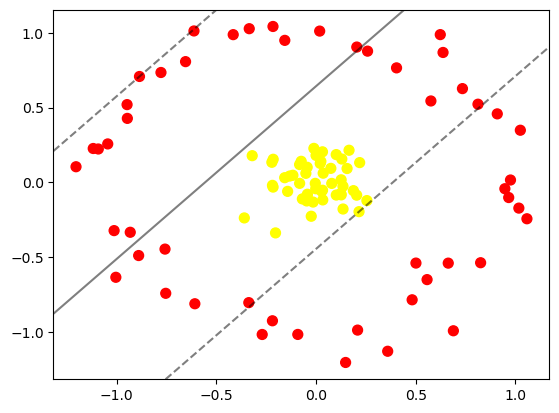

In [3]:
# Langkah 1c - Buat Data Dummy Non-Linier
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [4]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
r = X[:, 0] * 0.5 + X[:, 1] * 0.2
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-2.40968137e-02, -2.26860832e-01],
       [-9.47771742e-01,  5.20292739e-01],
       [-4.45780933e-02, -9.46162557e-02],
       [-2.70069527e-01, -1.01821223e+00],
       [ 9.75207236e-01,  1.56992380e-02],
       [-3.37201918e-01, -8.04991990e-01],
       [ 3.25263930e-02, -5.28222208e-02],
       [ 1.01519543e-01, -8.49733675e-02],
       [-4.65359941e-02, -1.24481623e-01],
       [-6.54404726e-01,  8.07895215e-01],
       [-4.44776661e-02,  1.00936540e-01],
       [ 2.26468337e-05,  1.80365726e-01],
       [ 4.03748284e-01,  7.66189281e-01],
       [-3.78339909e-03, -6.80920101e-03],
       [-1.01283309e+00, -3.23023090e-01],
       [ 7.34262686e-01,  6.27354924e-01],
       [ 5.76028301e-01,  5.44684244e-01],
       [ 1.29225041e-01,  1.56061104e-01],
       [-2.15957767e-01,  1.04320483e+00],
       [ 8.12150554e-01,  5.23016512e-01],
       [-4.15448727e-01,  9.88483625e-01],
       [ 6.23061157e-01,  9.88705439e-01],
       

In [5]:
# Langkah 2 - Fitting model
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

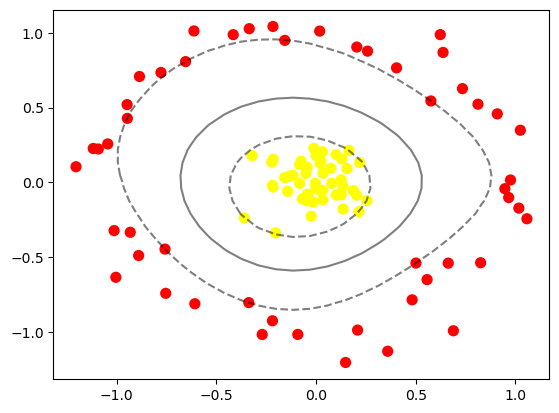

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')